In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Load dataset
df = pd.read_csv("spotify_data.csv")
print("Columns:", df.columns)

# Cleaning

# Drop rows with missing values in key columns
df = df.dropna(subset=[
    'popularity', 'genre', 'danceability', 'energy', 'acousticness',
    'instrumentalness', 'valence', 'tempo', 'loudness', 'speechiness', 'duration_ms'
])


if 'duration_min' not in df.columns:
    df['duration_min'] = df['duration_ms'] / 60000

Columns: Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')


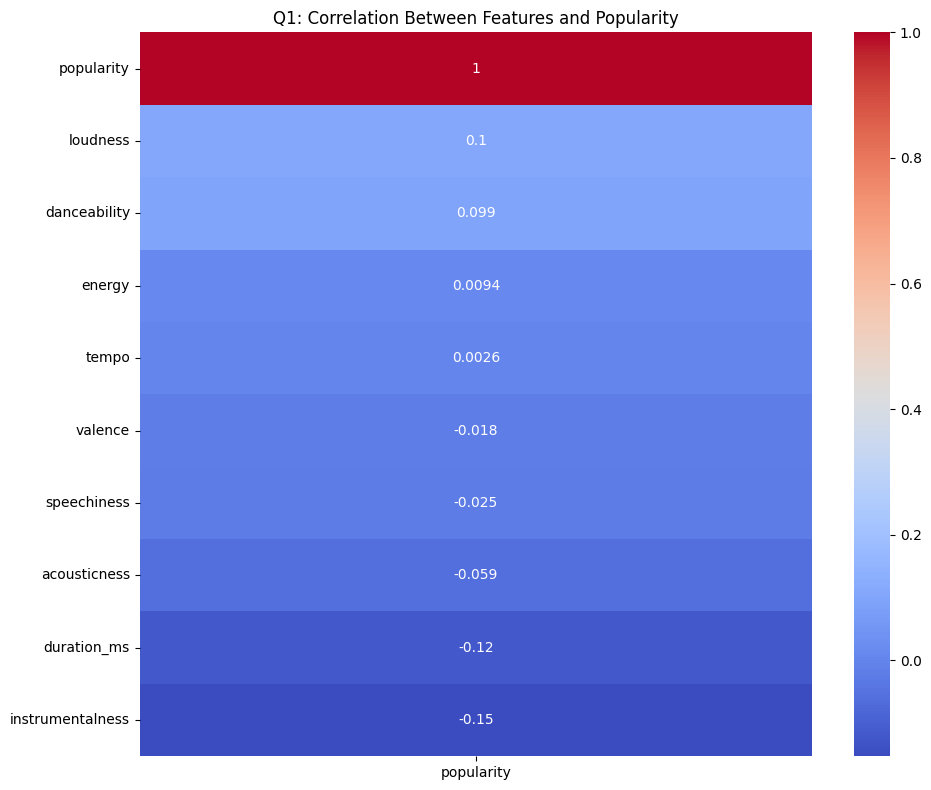

In [2]:
# Question 1: Which sound features drive a song’s popularity?

features = ['danceability', 'energy', 'acousticness', 'instrumentalness',
            'valence', 'tempo', 'loudness', 'speechiness', 'duration_ms', 'popularity']

df_q1 = df[features]

plt.figure(figsize=(10, 8))
sns.heatmap(df_q1.corr()[['popularity']].sort_values(by='popularity', ascending=False), annot=True, cmap='coolwarm')
plt.title("Q1: Correlation Between Features and Popularity")
plt.tight_layout()
plt.savefig("q1_feature_correlation.png", dpi=300)
plt.show()

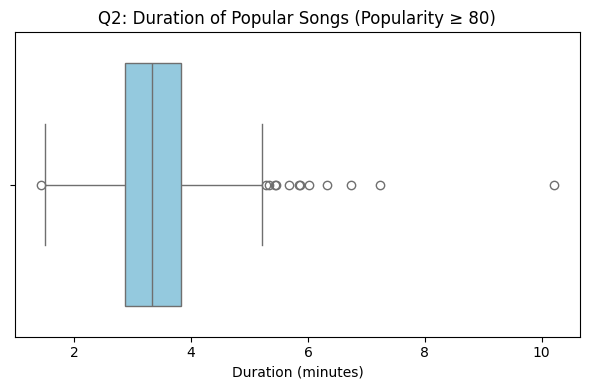

In [3]:
# Question 2: How long are the most popular songs?

# Filter for popular songs (popularity ≥ 80)
popular_songs = df[df['popularity'] >= 80]

plt.figure(figsize=(6, 4))
sns.boxplot(x=popular_songs['duration_min'], color='skyblue')
plt.title("Q2: Duration of Popular Songs (Popularity ≥ 80)")
plt.xlabel("Duration (minutes)")
plt.tight_layout()
plt.savefig("q2_popular_song_duration.png", dpi=300)
plt.show()

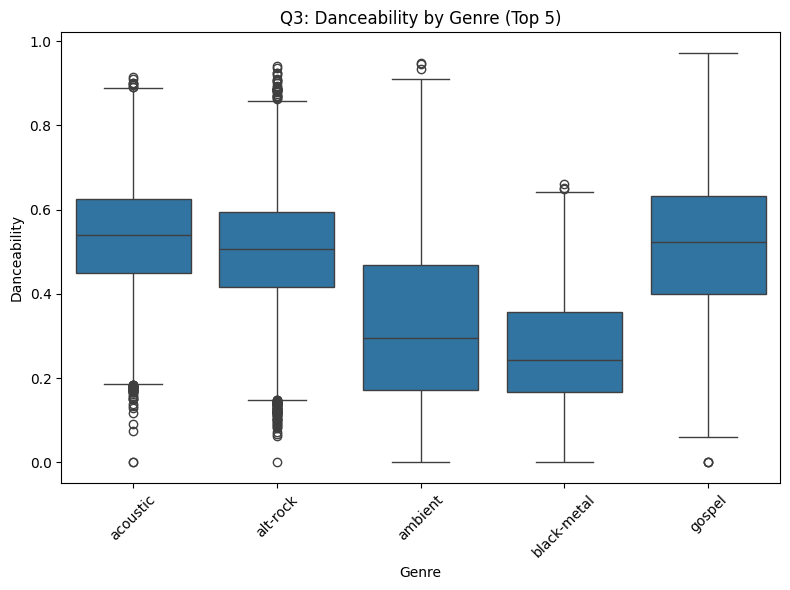

In [4]:
# Question 3: How do sound features differ between different genres?

genre_col = 'genre'
top_genres = df[genre_col].value_counts().head(5).index.tolist()
df_top_genres = df[df[genre_col].isin(top_genres)]

# Compare danceability across genres
plt.figure(figsize=(8, 6))
sns.boxplot(x=genre_col, y='danceability', data=df_top_genres)
plt.title("Q3: Danceability by Genre (Top 5)")
plt.xlabel("Genre")
plt.ylabel("Danceability")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("q3_danceability_by_genre.png", dpi=300)
plt.show()

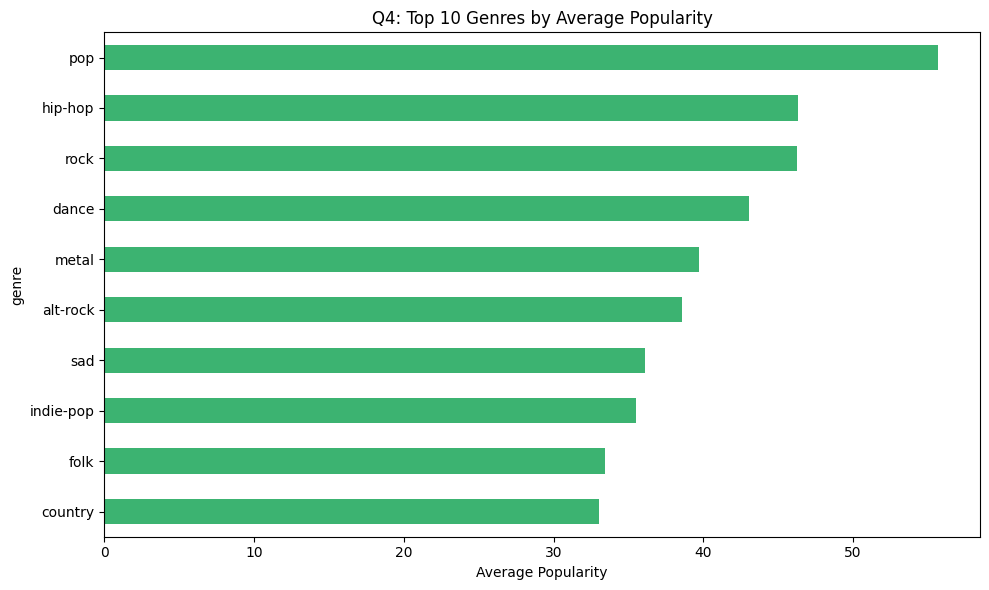

In [5]:
# Question 4: Which genres perform better than others?

# Make sure popularity is numeric and clean
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df = df[df['popularity'].notna()]

# Group by genre and calculate average popularity
genre_avg_popularity = (
    df.groupby(genre_col)['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
genre_avg_popularity.plot(kind='barh', color='mediumseagreen')
plt.title("Q4: Top 10 Genres by Average Popularity")
plt.xlabel("Average Popularity")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("q4_genres_by_popularity.png", dpi=300)
plt.show()